# Model: Logistic Regression Sex Only

This notebook walks through the steps of creating a logistic regression model using only the sex feature. 

A gender only submission to the Kaggle public leader board will yield a 0.76555 accuracy.

# Initialization

In [1]:
%run init.ipynb

In [42]:
from data.data import ExtractData

from sklearn.dummy import DummyClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.model_selection import (cross_val_score, 
                                     cross_val_score, cross_validate, 
                                    )


from yellowbrick.classifier import ConfusionMatrix

RANDOM_STATE = 42

# Extract data from processed data

In [43]:
Xy = pd.read_csv('../data/processed/train.csv', index_col='passengerid')
Xy

,survived,pclass,name,sex,sibsp,parch,ticket,fare,embarked,title,last_name,cabin_number,family_size,age_estimate,age,age_bin,is_child,is_travelling_alone
passengerid,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,Mr,Braund,21171.0,2,33.0,22.0,"(20.0, 30.0]",False,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,Mrs,Cumings,17599.0,2,35.9,38.0,"(30.0, 40.0]",False,False
3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,Miss,Heikkinen,3101282.0,1,22.0,26.0,"(20.0, 30.0]",False,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,Mrs,Futrelle,113803.0,2,35.9,35.0,"(30.0, 40.0]",False,False
5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,Mr,Allen,373450.0,1,33.0,35.0,"(30.0, 40.0]",False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S,Mr,Montvila,211536.0,1,33.0,27.0,"(20.0, 30.0]",False,True
888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S,Miss,Graham,112053.0,1,22.0,19.0,"(10.0, 20.0]",False,True
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,S,Miss,Johnston,6607.0,4,22.0,22.0,"(20.0, 30.0]",False,False


## Separate data into X (features) and y (label)

When I do this step I like to create a dataframe with my X (features) and y (labels) in a single dataframe.

The sex column is a categorical variable. I am going to convert this into dummy variable of 1s (male) and 0s (female).  The column headers are just the categories listed in alphabetical order. Since female is before male alphabetically the female column is dropped. 

In [6]:
X = pd.get_dummies(Xy['sex'], drop_first=True)  # X is a dataframe
y = Xy['survived'] # y is a series

### Split data into train and test. 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

print(f'Number of sample in training data = {len(X_train)}')
print(f'Number of sample in test data = {len(X_test)}')

Number of sample in training data = 712
Number of sample in test data = 179


### Dummy Classifier Most Frequent

Dummy classifier operate independent of the test data.  They are only intended to create a baseline.
For this classified, we will predict the most frequent outcome, which is everyone dies. 

In [37]:
model = DummyClassifier('most_frequent', random_state=RANDOM_STATE)
model.fit(X_train, y_train) 

y_pred = model.predict(X_test)

y_pred

DummyClassifier(constant=None, random_state=42, strategy='most_frequent')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [38]:
scores = cross_val_score(model, X_train, y_train, cv=5)
scores


print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

array([0.62237762, 0.62237762, 0.62237762, 0.62676056, 0.62411348])

Accuracy: 0.6236 (+/- 0.0034)


In [41]:
scores = cross_validate(model, X_train, y_train, cv=5, scoring=('accuracy', 'recall', 'precision', 'f1'))
scores

print("\n\nAccuracy: %0.4f (+/- %0.4f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
print("\n\Precision: %0.4f (+/- %0.4f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
print("\n\nAccuracy: %0.4f (+/- %0.4f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))

{'fit_time': array([0.00140595, 0.00096607, 0.001122  , 0.00142384, 0.00124073]),
 'score_time': array([0.00519013, 0.00413895, 0.00414205, 0.00380707, 0.00460315]),
 'test_accuracy': array([0.62237762, 0.62237762, 0.62237762, 0.62676056, 0.62411348]),
 'test_recall': array([0., 0., 0., 0., 0.]),
 'test_precision': array([0., 0., 0., 0., 0.]),
 'test_f1': array([0., 0., 0., 0., 0.])}



Accuracy: 0.6236 (+/- 0.0034)

\Precision: 0.6236 (+/- 0.0034)


Accuracy: 0.6236 (+/- 0.0034)


## Visualize Confusion Matrix

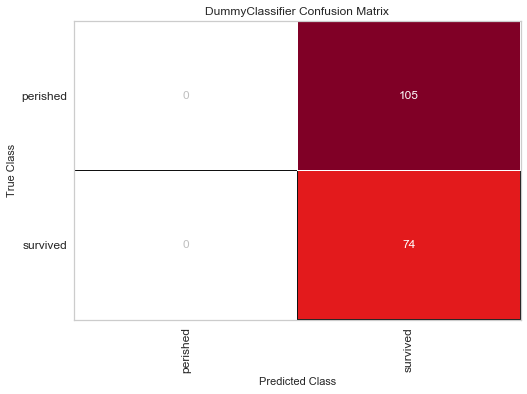

In [35]:

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model, classes=['perished','survived'])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show();